 ## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans

In [16]:
def ImageSegmentation(im, dominant_colors):
    original_shape = im.shape        #Reads an image into BGR Format
    plt.imshow(im)         # as RGB Format
    plt.show()
    # there are 330*500 pixels and each pixel contins 3 colours (RGB) / features -> and these 3 colours together represent 1 colour

    # Flatten Each channel of the Image
    all_pixels  = im.reshape((-1,3))
    km = KMeans(n_clusters=dominant_colors)
    km.fit(all_pixels)
    centers = km.cluster_centers_
    centers = np.array(centers,dtype='uint8')

    # to plot all dominant colors
    i = 1
    plt.figure(0,figsize=(8,2))
    colors = []
    for each_col in centers:
        plt.subplot(1,dominant_colors,i)
        plt.axis("off")
        i+=1
    
        colors.append(each_col)
    
        #Color Swatch
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = each_col
        plt.imshow(a)
    plt.show()

    # segmenting original image
    new_img = np.zeros((original_shape[0]*original_shape[1],3),dtype='uint8')
    for ix in range(new_img.shape[0]):
        new_img[ix] = colors[km.labels_[ix]]
    
    new_img = new_img.reshape((original_shape))
    plt.imshow(new_img)
    plt.show()

Enter number of dominant colours:  4


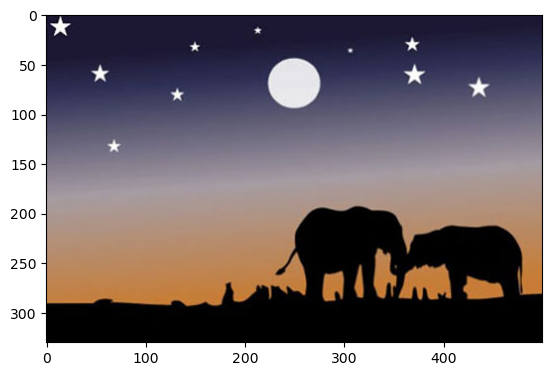

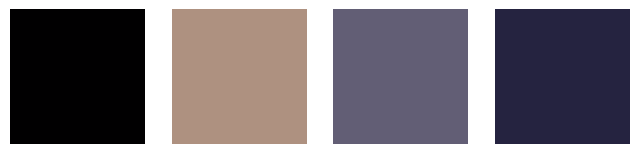

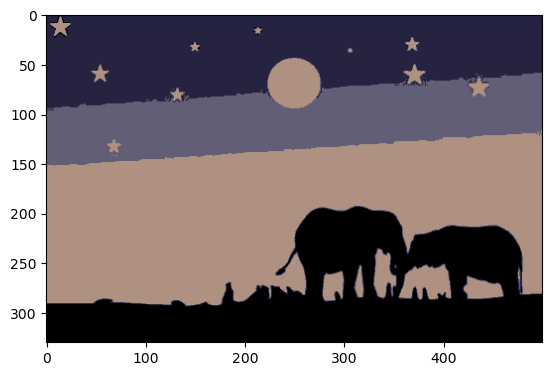

In [17]:
im =  cv2.imread('elephant_img.jpg') #Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
dominant_colors = int(input("Enter number of dominant colours: "))
ImageSegmentation(im, dominant_colors)

Enter number of dominant colours:  3


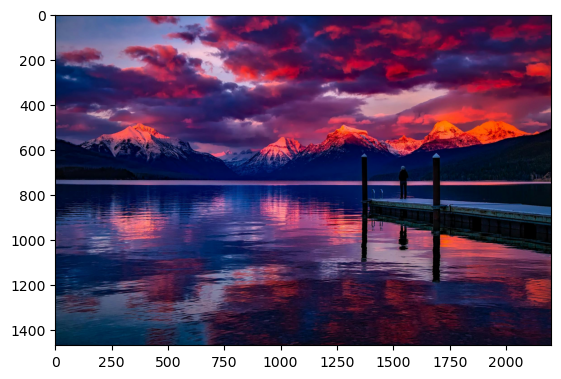

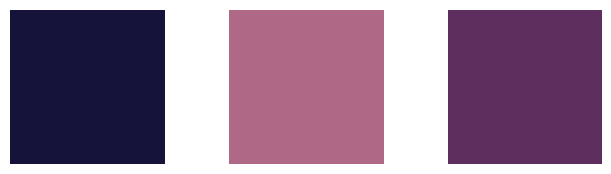

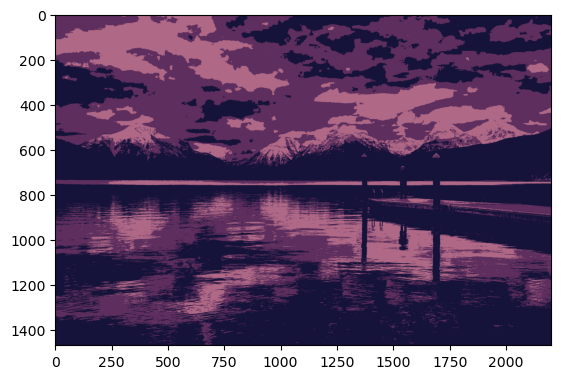

In [18]:
im2 =  cv2.imread('scenery3.jpg') 
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
dominant_colors = int(input("Enter number of dominant colours: "))
ImageSegmentation(im2, dominant_colors)

Enter number of dominant colours:  5


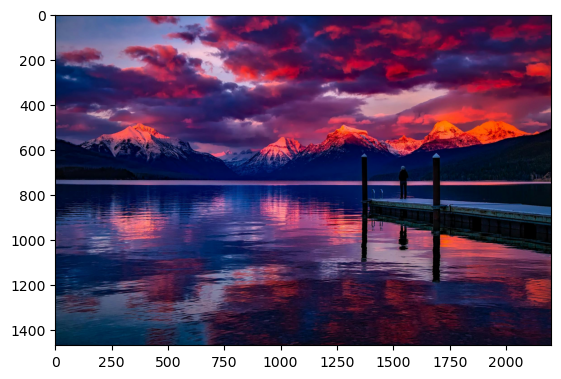

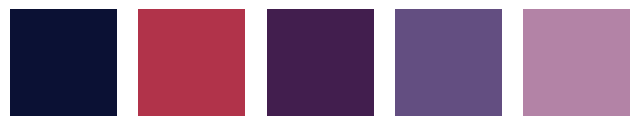

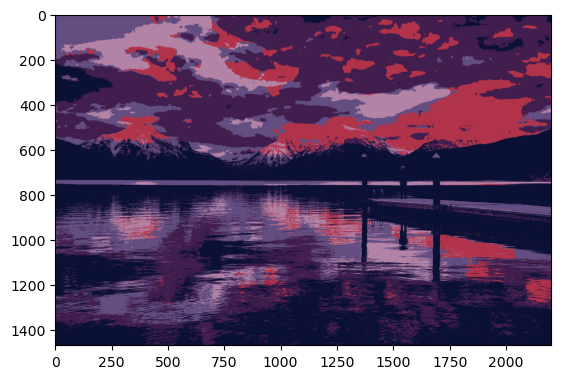

In [19]:
dominant_colors = int(input("Enter number of dominant colours: "))
ImageSegmentation(im2, dominant_colors)